In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/BHBikash/FinalDataset/main/Dataset%20O2N.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.sort_index(ascending=True, inplace=True)
data['Price'] = pd.to_numeric(data['Price'])

In [ ]:
model = ARIMA(data['Price'], order=(1, 0, 0))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [ ]:
predictions = model_fit.predict(start=data.index[0], end=data.index[-1])
mse = mean_squared_error(data['Price'], predictions)
rmse = mean_squared_error(data['Price'], predictions, squared=False)
mae = mean_absolute_error(data['Price'], predictions)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)

MSE: 0.1968980917219666
RMSE: 0.4437320043922532
MAE: 0.16451614352516314


Equation: y(t) = c + ϕ(1)*y(t-1) + ε(t)

In [ ]:
future_dates = pd.date_range(start=data.index[-1], periods=181, freq='D')[1:]
future_predictions = model_fit.predict(start=len(data), end=len(data)+179)
future_data = pd.DataFrame({'Date': future_dates, 'Forecasted Price': future_predictions})
print(future_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


           Date  Forecasted Price
2556 2023-06-16        108.185861
2557 2023-06-17        108.171730
2558 2023-06-18        108.157608
2559 2023-06-19        108.143494
2560 2023-06-20        108.129389
...         ...               ...
2731 2023-12-08        105.837109
2732 2023-12-09        105.824380
2733 2023-12-10        105.811659
2734 2023-12-11        105.798946
2735 2023-12-12        105.786240

[180 rows x 2 columns]


In [ ]:
forecast = model_fit.forecast(steps=30)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
forecast_data = pd.DataFrame({'Date': pd.date_range(start=data.index[-30] + pd.DateOffset(1), periods=30), 'Forecasted Price': forecast})

In [ ]:
print(forecast_data)

           Date  Forecasted Price
2556 2023-05-03        108.185861
2557 2023-05-04        108.171730
2558 2023-05-05        108.157608
2559 2023-05-06        108.143494
2560 2023-05-07        108.129389
2561 2023-05-08        108.115292
2562 2023-05-09        108.101203
2563 2023-05-10        108.087123
2564 2023-05-11        108.073051
2565 2023-05-12        108.058988
2566 2023-05-13        108.044933
2567 2023-05-14        108.030886
2568 2023-05-15        108.016848
2569 2023-05-16        108.002818
2570 2023-05-17        107.988797
2571 2023-05-18        107.974784
2572 2023-05-19        107.960779
2573 2023-05-20        107.946783
2574 2023-05-21        107.932795
2575 2023-05-22        107.918815
2576 2023-05-23        107.904844
2577 2023-05-24        107.890881
2578 2023-05-25        107.876926
2579 2023-05-26        107.862980
2580 2023-05-27        107.849042
2581 2023-05-28        107.835113
2582 2023-05-29        107.821191
2583 2023-05-30        107.807278
2584 2023-05-3

In [ ]:
merged_df = pd.merge(data, forecast_data, on='Date', how='inner')

In [ ]:
merged_df['Difference'] = merged_df['Price'] - merged_df['Forecasted Price']

In [ ]:
print(merged_df[['Date', 'Price', 'Forecasted Price', 'Difference']])

         Date    Price  Forecasted Price  Difference
0  2023-05-03  106.440        108.185861   -1.745861
1  2023-05-08  106.930        108.115292   -1.185292
2  2023-05-09  107.740        108.101203   -0.361203
3  2023-05-10  107.330        108.087123   -0.757123
4  2023-05-11  107.340        108.073051   -0.733051
5  2023-05-15  107.850        108.016848   -0.166848
6  2023-05-16  107.360        108.002818   -0.642818
7  2023-05-17  107.350        107.988797   -0.638797
8  2023-05-18  107.260        107.974784   -0.714784
9  2023-05-19  107.324        107.960779   -0.636779
10 2023-05-22  107.200        107.918815   -0.718815
11 2023-05-23  107.790        107.904844   -0.114844
12 2023-05-24  107.180        107.890881   -0.710881
13 2023-05-25  107.160        107.876926   -0.716926
14 2023-05-26  107.205        107.862980   -0.657980
15 2023-05-29  107.180        107.821191   -0.641191
16 2023-05-30  107.240        107.807278   -0.567278
17 2023-05-31  107.200        107.793374   -0.

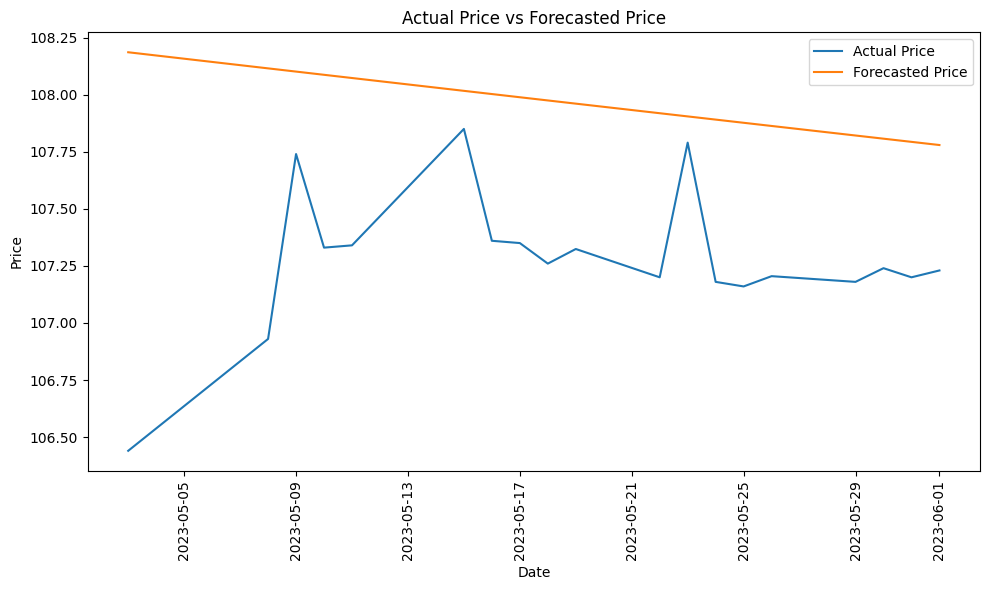

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot( merged_df['Date'], merged_df['Price'],  label='Actual Price')
plt.plot( merged_df['Date'], merged_df['Forecasted Price'],  label='Forecasted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual Price vs Forecasted Price')
plt.legend()
plt.xticks(rotation=90)
plt.savefig('arimagraph.png', dpi=300)
plt.tight_layout()
plt.show()

(array([19539., 19570., 19601., 19631., 19662., 19692.]),
 [Text(19539.0, 0, '2023-07'),
  Text(19570.0, 0, '2023-08'),
  Text(19601.0, 0, '2023-09'),
  Text(19631.0, 0, '2023-10'),
  Text(19662.0, 0, '2023-11'),
  Text(19692.0, 0, '2023-12')])

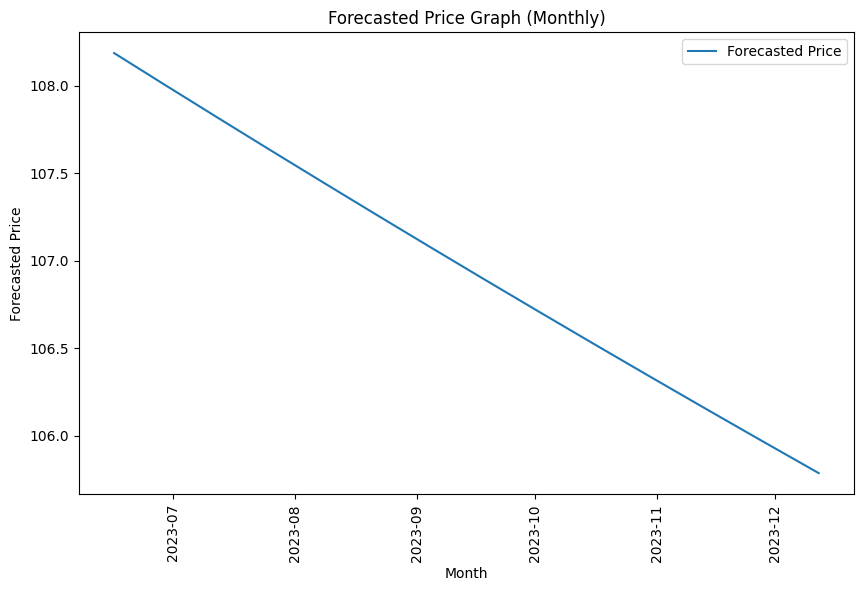

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot( future_data['Date'], future_data['Forecasted Price'],  label='Forecasted Price')
plt.xlabel('Month')
plt.ylabel('Forecasted Price')
plt.title('Forecasted Price Graph (Monthly)')
plt.legend()
plt.xticks(rotation=90)